In [2]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np 
  
# read a image using imread
#cv2.imread(file path or name ,0->for grey, 1 or nothing -> color) 
img = cv2.imread('tube.jpg',0)
# cv2.resize(ip image,desired size,outputimage,fx,fy)
image=cv2.resize(img, (0,0),None, 0.5, 0.5 )

img1 = cv2.imread('tube_off.jpg',0)
image1 = cv2.resize(img1, (0,0),None, 0.5, 0.5)

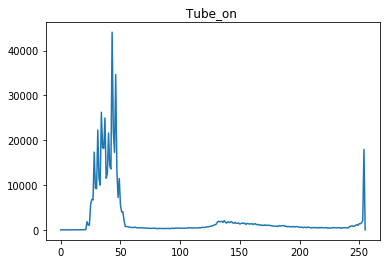

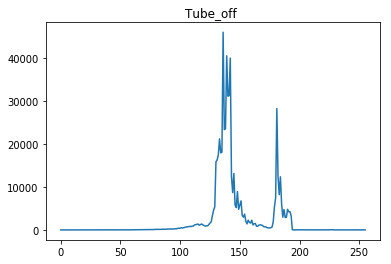

In [3]:
# histogram of tube
 #cv2.calcHist([images], [channels], mask, [histSize], [ranges]) 
hist = cv2.calcHist([img],[0],None,[256],[0,255])
plt.subplot(111)
plt.plot(hist)
plt.title("Tube_on ") 
plt.show()

hist = cv2.calcHist([img1],[0],None,[256],[0,255])
plt.subplot(111)
plt.plot(hist)
plt.title("Tube_off ")
plt.show() 


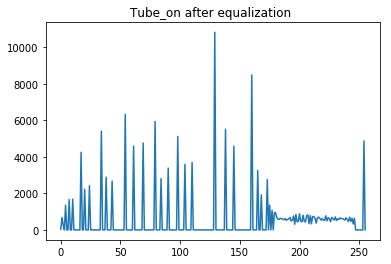

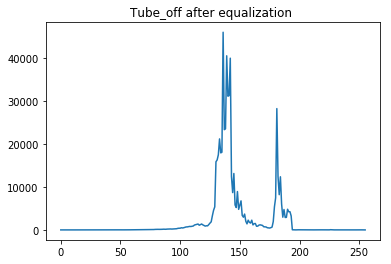

In [4]:
equ = cv2.equalizeHist(image)
equ1 = cv2.equalizeHist(image1) 

# histogram of tube after equilization
#hist is an array showing pixels population

hist1 = cv2.calcHist([equ],[0],None,[256],[0,255])
plt.subplot(111)
plt.plot(hist1)
plt.title("Tube_on after equalization ")
plt.show() 

hist1 = cv2.calcHist([equ1],[0],None,[256],[0,255])
plt.subplot(111)
plt.plot(hist)
plt.title("Tube_off after equalization ") 
plt.show()

In [5]:
# stacking images side-by-side 
res = np.hstack((image, equ)) 
res1 = np.hstack((image1, equ1))

cv2.imshow(' Original and Equalized image of Tube_ON', res)
cv2.imshow(' Original and Equalized image of Tube_OFF', res1)

k =cv2.waitKey(0) & 0xFF
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()

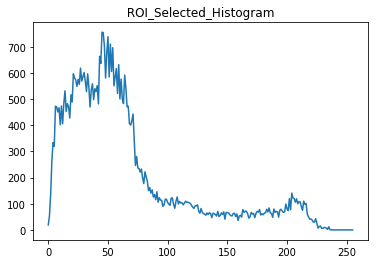

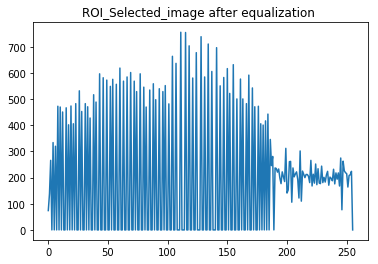

In [8]:
# roi selected

img = cv2.imread('piyushh.jpeg',0)
img2 = img.copy()
r = cv2.selectROI(img,fromCenter = False)
#Crop image
template = img[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
cv2.imshow("ROI_Selected",template)
k =cv2.waitKey(0) & 0xFF
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()

cv2.imwrite('roi_selected.jpg',template)


hist = cv2.calcHist([template],[0],None,[256],[0,255])
plt.subplot(111)
plt.plot(hist)
plt.title(" ROI_Selected_Histogram ") 
plt.show()
equ3 = cv2.equalizeHist(template)

hist1 = cv2.calcHist([equ3],[0],None,[256],[0,255])
plt.subplot(111)
plt.plot(hist1)
plt.title("ROI_Selected_image after equalization ")
plt.show() 

res3 = np.hstack((template, equ3))

cv2.imshow(' Original and Equalized image of ROI', res3)

k =cv2.waitKey(0) & 0xFF
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()